In [46]:
import pandas as pd

In [82]:
ted_data = pd.read_feather('ted_data')

In [83]:
ted_data.head()

,views,comments,duration,film_date,languages,num_speaker,published_date,Funny_ratings,Beautiful_ratings,Ingenious_ratings,...,is_ global issues_tags_cleaned,is_ science_tags_cleaned,is_ technology_tags_cleaned,is_ entertainment_tags_cleaned,is_ health_tags_cleaned,is_ design_tags_cleaned,is_ social change_tags_cleaned,is_ innovation_tags_cleaned,is_ society_tags_cleaned,is_TEDx_tags_cleaned
0,47227110,4553,1164,1140825600,60,1,1151367060,19645.0,4573.0,6073.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3200520,265,977,1140825600,43,1,1151367060,544.0,58.0,56.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1636292,124,1286,1140739200,26,1,1151367060,964.0,60.0,183.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1697550,200,1116,1140912000,35,1,1151367060,59.0,291.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12005869,593,1190,1140566400,48,1,1151440680,1390.0,942.0,3202.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y = ted_data.views
X = ted_data.drop(columns=['views'])

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
ted_data.isnull().values.any()

False

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

In [88]:
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
X_train_rfecv = rfecv.fit(X_train,y_train)

In [89]:
grid_scores = X_train_rfecv.grid_scores_
x_value_range = list(range(0, 33))[::-1]

In [90]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range, grid_scores)
plot([score_trace])

In [91]:
grid_scores

array([0.00617113, 0.01539121, 0.02376844, 0.0235566 , 0.02408569,
       0.02652037, 0.02626541, 0.05015238, 0.04999666, 0.07504308,
       0.13682982, 0.2213299 , 0.33443434, 0.39813723, 0.40558803,
       0.40854707, 0.45354606, 0.49487572, 0.53377984, 0.60687425,
       0.64296416, 0.65987126, 0.66572467, 0.66335187, 0.6652187 ,
       0.66473167, 0.66023335, 0.65927118, 0.66027341, 0.66072289,
       0.67635591, 0.67636242])

In [92]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.33, random_state=35)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 33, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_validate_rfe = rfe.transform(X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_validate_rfe,y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [95]:
wrapped_selectors = np.array(selectors)

In [96]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [97]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ted_data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
scaled_data = scaler.fit_transform(ted_data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [101]:
scaled_X = scaled_data[:, 1:]
scaled_y = scaled_data[:, 0]

In [102]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, scaled_y, test_size=0.33, random_state=35)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
model = LinearRegression(n_jobs = -1)
rfecv = RFECV(model, cv = 5)
X_train_rfecv = rfecv.fit(X_train,y_train)

In [104]:
grid_scores = X_train_rfecv.grid_scores_

In [105]:
grid_scores

array([5.42381967e-04, 9.25928992e-03, 1.04171839e-02, 1.66873577e-02,
       2.08194413e-02, 1.82132198e-02, 1.94012287e-02, 1.70026778e-02,
       3.72507273e-02, 6.84461585e-02, 1.36365246e-01, 1.61636435e-01,
       1.36219975e-01, 3.51385604e-01, 3.21857905e-01, 4.23897547e-01,
       4.97896567e-01, 4.93479115e-01, 5.07330797e-01, 5.74617757e-01,
       6.17718790e-01, 6.16333272e-01, 6.19454178e-01, 6.29426466e-01,
       6.31301874e-01, 6.17457536e-01, 6.15509011e-01, 6.15526115e-01,
       6.17429934e-01, 6.17930428e-01, 6.34008898e-01, 6.33993528e-01])

In [106]:
x_value_range = list(range(0, len(grid_scores)))[::-1]

In [107]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range[-50:], grid_scores[-50:])
plot([score_trace])

In [108]:
scaled_X_train, scaled_X_validate, scaled_y_train, scaled_y_validate = train_test_split(scaled_X_train, scaled_y_train, test_size=0.33, random_state=35)

In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 33, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    scaled_X_train_rfe = rfe.fit_transform(scaled_X_train,scaled_y_train)
    scaled_X_validate_rfe = rfe.transform(scaled_X_validate)
    # 4. compute the accuracy score and append to the list
    estimator.fit(scaled_X_train_rfe,scaled_y_train)
    score = estimator.score(scaled_X_validate_rfe,scaled_y_validate)
    selectors.append(np.array([rfe, score, idx]))

In [111]:
wrapped_selectors = np.array(selectors)

In [112]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [149]:
wrapped_selectors[-4, 0].estimator_.coef_

array([0.27905423, 0.21408435, 0.38520725, 0.18199012])

In [150]:
support = wrapped_selectors[-4, 0].get_support()

In [151]:
import numpy as np
feature_names = np.array(X.columns) # transformed list to array
names = feature_names[support]

array(['Funny_ratings', 'Beautiful_ratings', 'Informative_ratings',
       'OK_ratings'], dtype=object)

In [113]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [158]:
wrapped_selectors[-4, 0].score(scaled_X_test, scaled_y_test)

0.8222000353530414

In [159]:
scaler.inverse_transform(scaled_data)

array([[4.722711e+07, 4.553000e+03, 1.164000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.200520e+06, 2.650000e+02, 9.770000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.636292e+06, 1.240000e+02, 1.286000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [3.756470e+05, 1.000000e+01, 6.510000e+02, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.193090e+05, 3.200000e+01, 1.100000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.917210e+05, 8.000000e+00, 5.190000e+02, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [160]:
model = LinearRegression(n_jobs = -1)

In [169]:
model.fit(X_train[feature_names[support]],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [170]:
model.score(X_test[feature_names[support]], y_test)

0.8222000353530405

In [172]:
model.intercept_

268845.05116320425

In [171]:
model.coef_

array([1183.44351914, 1120.4704627 , 1781.53664189, 5034.23890768])

In [184]:
names = feature_names[support]
reduced_X = X[names]


In [185]:
reduced_X.corr(method = 'spearman')


,Funny_ratings,Beautiful_ratings,Informative_ratings,OK_ratings
Funny_ratings,1.000000,0.359892,0.271243,0.479794
Beautiful_ratings,0.359892,1.000000,0.018205,0.251480
Informative_ratings,0.271243,0.018205,1.000000,0.446531
OK_ratings,0.479794,0.251480,0.446531,1.000000


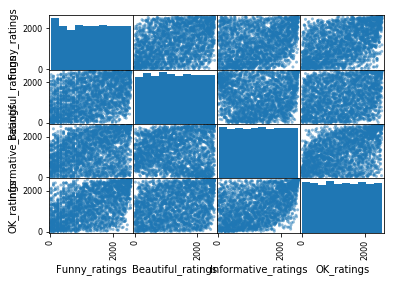

In [187]:
pd.plotting.scatter_matrix(reduced_X.rank());

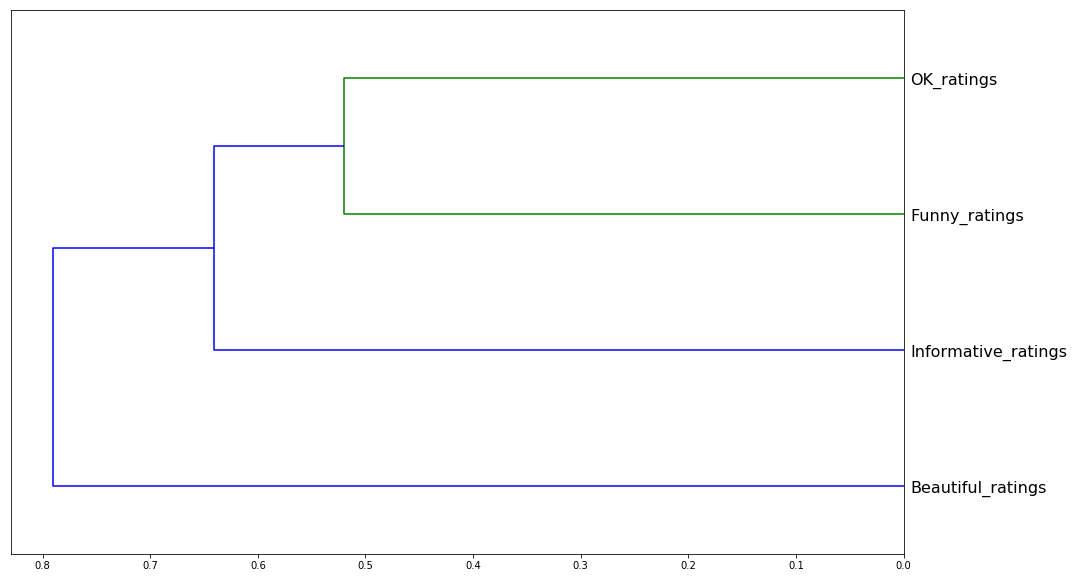

In [189]:
import numpy as np
import scipy.cluster.hierarchy as hc
corr = reduced_X.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = reduced_X.columns, orientation = 'left', leaf_font_size=16)